# King County Airbnb

# Overview


Airbnb Musketeers LLC was founded to help aspiring Airbnb owners to purchase a house in order to start up their Airbnb business. Arthur Macintosh, a local businessman, reached out to our company and asked for us to help him purchase a home in King County, Washington. The goal of this data analysis is to give Mr.Macintosh recommendations on what houses he should consider while simultaneously saving him money. The data that we used originally consisted of 21,597 houses that were built between 1900 and 2015. We narrowed that number by dropping nulls which brought the data to 15,762 houses. We further narrowed that number by dropping houses that had more than 5 bedrooms in order get rid of outliers which left us with 14,342 houses. After all of those reductions we were left with roughly 2/3 of the data to work with. The methods we used to clean our data and create our models were train-test-split, OLS models, removing irrelevant data, filtering unwanted outliers and handling missing data.  After a deep analysis of our data we came to the conclusion that he should purchase a home in the metro, with average or below average square footage, and with 3 bedrooms or 2 bathrooms minimun, based on the results that pointed that it was cheaper to live in the metro, square footage is higher in the city than in the metro area, and a house with 3 bedrooms and 2 bathrooms is cheaper to have in the metro if we sacrificied some living area square footage. 

## Business Problem

Mr.Macintosh wants to buy a house that he can have for personal use and also be able to seasonally rent out as an Airbnb vacation home. He wants the house to be able to host a family and therefore we are tasked to find a suitable house for families that travel to King County. Our predictions are important in order to be able to help Mr.Macintosh find the best house for his Airbnb business while also saving him money since this is not the only house that we are helping him purchase. It is important that we find a house priced at a reasonable amount in order for him to eventually be able to set a rental rate that generates him the most profit. 


## Data Understanding

Describe the data being used for this project.
The data that we are using came from the King County Houses database. The data relates to our analysis question because it contains all the variables that we need in order to be able to deliver to Mr.Macintosh the types of houses that he should consider buying based on his interests. The main target variable is price. Other variables that we intend to use are bedrooms, bathrooms, sqft_living (Square footage of living space in the home), floor (Number of floors levels in house), zip code, and view(Quality of view from house). We cleaned up the data by removing irrelevant data, filtering unwanted outliers, scaling, and handling missing data. We also produced visuals that help support our findings and recommendations for Mr.Macintosh. 


# Imports 

In [187]:
import pandas as pd 
import seaborn as sns
import numpy as np

from IPython.display import Markdown, display
import itertools
import pickle 
from numbers import Number

from scipy import stats
import statsmodels 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Data Clean Up

## Data Preparation

- What variables were kept?
    - price 
    - bedrooms
    - bathrooms
    - sqft_living
    - floor
    - zip code
    - view
    
- Were there variables you dropped or created?
    - id 
    - date 
    - sqft_lot
    - waterfront
    - condition
    - grade
    - sqft_above
    - sqft_basement
    - yr_ renovated
    - lat
    - long 
    - sqft_living15
    - sqft_lot15
    
- How did you address missing values or outliers?
    - Dropped null values including question marks 
    - Filtered out our data in order to get rid of outliers
    
- Why are these choices appropriate given the data and the business problem?
    - It was appropriate to drop the variables above because they did not have 
      numeric values and would not fit in our model 
    - It was also appropriate to filter out data because certain homes had up to around 30 bedrooms and 
      those outliers were skewing our data. Because our end goal was to find a vacation home for an average family       it was irrelevant for us to consider a house with that amount of bedrooms.  
      
- How much of the data have we dropped?
    - We narrowed the amount of data that we were working with by dropping nulls which brought the data to 15,762 houses. We further narrowed that number by dropping houses that had more than 5 bedrooms in order get rid of outliers which left us with 14,342 houses. After all of those reductions we were left we dropped 1/3 of the data leaving us with roughly 2/3 of the data to work with. 

In [238]:
df = pd.read_csv('data/kc_house_data.csv')

In [239]:
df.head(100)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1483300570,9/8/2014,905000.0,4,2.50,3300,10250,1.0,NO,NONE,...,7 Average,2390,910.0,1946,1991.0,98040,47.5873,-122.249,1950,6045
96,3422049190,3/30/2015,247500.0,3,1.75,1960,15681,1.0,NO,NONE,...,7 Average,1960,0.0,1967,0.0,98032,47.3576,-122.277,1750,15616
97,1099611230,9/12/2014,199000.0,4,1.50,1160,6400,1.0,NO,NONE,...,7 Average,1160,0.0,1975,0.0,98023,47.3036,-122.378,1160,6400
98,722079104,7/11/2014,314000.0,3,1.75,1810,41800,1.0,NO,NONE,...,7 Average,1210,600.0,1980,0.0,98038,47.4109,-121.958,1650,135036


In [240]:
df['view'].unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [241]:
df = df.dropna()

In [242]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,8 Good,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  object 
 9   view           15762 non-null  object 
 10  condition      15762 non-null  object 
 11  grade          15762 non-null  object 
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

In [244]:
df['view'].value_counts()

NONE         14241
AVERAGE        688
GOOD           348
FAIR           245
EXCELLENT      240
Name: view, dtype: int64

In [245]:
df['view'].replace({"NONE": 1, "FAIR": 2, "AVERAGE": 3, "GOOD": 4, "EXCELLENT": 5}, inplace=True)

In [246]:
df['grade'].unique()

array(['7 Average', '8 Good', '11 Excellent', '9 Better', '6 Low Average',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [247]:
df['grade'].replace({'7 Average': 7 , '8 Good': 8, '11 Excellent': 11, '9 Better': 9, '6 Low Average': 6,
       '5 Fair': 5, '10 Very Good': 10, '12 Luxury': 12, '4 Low': 4, '3 Poor': 3,
       '13 Mansion': 13}, inplace=True)

In [248]:
def find_dist(lat_cell, long_cell):
    seattle_lat = 47.6062
    seattle_long = -122.3321
    distance = np.sqrt((lat_cell-seattle_lat)**2 + (long_cell-seattle_long)**2)
    return distance

In [249]:
df['Area'] = df.apply(lambda x: find_dist(x['lat'], x['long']), axis=1)

In [250]:
city = df.loc[df['Area'] < 10 ]
metro = df.loc[df['Area'] > 10 ]

In [251]:
city['price'].describe()

count    1.576200e+04
mean     5.413172e+05
std      3.722258e+05
min      8.200000e+04
25%      3.210000e+05
50%      4.500000e+05
75%      6.448750e+05
max      7.700000e+06
Name: price, dtype: float64

In [252]:
metro['price'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: price, dtype: float64

In [253]:
df['Area'].describe()

count    15762.000000
mean         0.201224
std          0.121640
min          0.013106
25%          0.096597
50%          0.179831
75%          0.285597
max          1.022505
Name: Area, dtype: float64

In [254]:
# df['Area'].replace({<10: 0, >10: 1}, inplace=True)
df['Area'] = df['Area'].apply(lambda x: 0 if x < 10 else 1)

In [255]:
df.loc[df['Area']==1].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Area
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [256]:
Area = []
for x in df['Area']:
    miles = round(x * 69)
    Area.append(miles)

In [257]:
len(Area)

15762

In [258]:
df['Area'] = Area

In [259]:
df = df.drop(columns=['id', 'date', 'waterfront', 'condition', 'lat', 'long', 'sqft_basement', 'sqft_lot', 'sqft_above', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'zipcode'])

In [260]:
df

,price,bedrooms,bathrooms,sqft_living,floors,view,grade,Area
1,538000.0,3,2.25,2570,2.0,1,7,0
3,604000.0,4,3.00,1960,1.0,1,7,0
4,510000.0,3,2.00,1680,1.0,1,8,0
5,1230000.0,4,4.50,5420,1.0,1,11,0
6,257500.0,3,2.25,1715,2.0,1,7,0
...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,2.0,1,8,0
21592,360000.0,3,2.50,1530,3.0,1,8,0
21593,400000.0,4,2.50,2310,2.0,1,8,0
21594,402101.0,2,0.75,1020,2.0,1,7,0


In [261]:
df['bedrooms'].value_counts()

3     7120
4     5079
2     2003
5     1183
6      192
1      141
7       23
8       10
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [262]:
df = df.loc[df['bedrooms']<=4]

In [263]:
df

,price,bedrooms,bathrooms,sqft_living,floors,view,grade,Area
1,538000.0,3,2.25,2570,2.0,1,7,0
3,604000.0,4,3.00,1960,1.0,1,7,0
4,510000.0,3,2.00,1680,1.0,1,8,0
5,1230000.0,4,4.50,5420,1.0,1,11,0
6,257500.0,3,2.25,1715,2.0,1,7,0
...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,2.0,1,8,0
21592,360000.0,3,2.50,1530,3.0,1,8,0
21593,400000.0,4,2.50,2310,2.0,1,8,0
21594,402101.0,2,0.75,1020,2.0,1,7,0


In [264]:
df = df.drop(columns=['floors'])

In [265]:
df

,price,bedrooms,bathrooms,sqft_living,view,grade,Area
1,538000.0,3,2.25,2570,1,7,0
3,604000.0,4,3.00,1960,1,7,0
4,510000.0,3,2.00,1680,1,8,0
5,1230000.0,4,4.50,5420,1,11,0
6,257500.0,3,2.25,1715,1,7,0
...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,1,8,0
21592,360000.0,3,2.50,1530,1,8,0
21593,400000.0,4,2.50,2310,1,8,0
21594,402101.0,2,0.75,1020,1,7,0


In [266]:
df = df.loc[df['bedrooms']<=4]

In [267]:
df

,price,bedrooms,bathrooms,sqft_living,view,grade,Area
1,538000.0,3,2.25,2570,1,7,0
3,604000.0,4,3.00,1960,1,7,0
4,510000.0,3,2.00,1680,1,8,0
5,1230000.0,4,4.50,5420,1,11,0
6,257500.0,3,2.25,1715,1,7,0
...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,1,8,0
21592,360000.0,3,2.50,1530,1,8,0
21593,400000.0,4,2.50,2310,1,8,0
21594,402101.0,2,0.75,1020,1,7,0


## Modeling

Describe and justify the process for analyzing or modeling the data.

- We analyzed the data by looking for variables that better correlated with price. We did this to find what variable(s) affected the overall price of the house.  
- We iterated our initial approach and made it better by taking out certain variables from our data frame that were not useful in solving our business problem. We also removed outliers and null values.
- These choices were appropriate given our data and business problem because we were able to remove variables that skewed our data and that were not significant to consider when trying to solve our business problem. 

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

<AxesSubplot:>

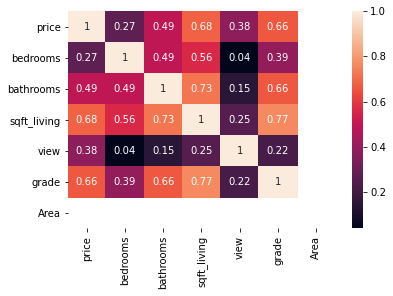

In [268]:
sns.heatmap(df.corr(), annot=True)

In [269]:
X= df.drop(columns='price')
Y= df['price']

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [271]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X_train)
results = sm.OLS(y_train, sm.add_constant(X_train)).fit()
results.summary()

/Users/litzysalazar/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     2882.
Date:                Fri, 01 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:17:45   Log-Likelihood:            -1.4711e+05
No. Observations:               10757   AIC:                         2.942e+05
Df Residuals:                   10751   BIC:                         2.943e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.733e+05   1.87e+04    -25.265      0.000    -5.1e+05   -4.37e+05
bedrooms    -4.932e+04   3581.728    -13.771      0.000   -5.63e+04   -4.23e+04
bathrooms   -1.976e+04   4343.650     -4.548      0.000   -2.83e+04   -1.12e+04
sqft_living   182.0888      4.677     38.936      0.000     172.922     191.256
view         9.407e+04   2925.899     32.152      0.000    8.83e+04    9.98e+04
grade        9.361e+04   2885.706     32.440      0.000     8.8e+04    9.93e+04
Area                 0          0        nan        nan           0           0
==============================================================================
Omnibus:                     5810.934   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           106230.860
Skew:                           2.189   Prob(JB):                         0.00
Kurtosis:                      17.759   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Interpretation
- This model explains 48% of our variance in our Y
- Bathrooms and Square foot of the house are statistically significant with a p-value of 0.
- one additional bedroom unit drives down the expected price by about -6.948e+04
- one additional sqft_living unit drives up the expected price by about 296.

In [272]:
X_test_scaled = ss.fit_transform(X_test)
results = sm.OLS(y_test, sm.add_constant(X_test)).fit()
results.summary()

/Users/litzysalazar/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     888.2
Date:                Fri, 01 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:17:45   Log-Likelihood:                -49068.
No. Observations:                3586   AIC:                         9.815e+04
Df Residuals:                    3580   BIC:                         9.819e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.307e+05   3.34e+04    -12.881      0.000   -4.96e+05   -3.65e+05
bedrooms     -4.56e+04   6225.995     -7.325      0.000   -5.78e+04   -3.34e+04
bathrooms   -3.004e+04   7510.043     -4.001      0.000   -4.48e+04   -1.53e+04
sqft_living   192.5932      7.963     24.187      0.000     176.981     208.205
view         7.282e+04   5043.318     14.439      0.000    6.29e+04    8.27e+04
grade        8.983e+04   5074.973     17.700      0.000    7.99e+04    9.98e+04
Area                 0          0        nan        nan           0           0
==============================================================================
Omnibus:                     2109.292   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41748.044
Skew:                           2.407   Prob(JB):                         0.00
Kurtosis:                      19.007   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [273]:
X2= df['bedrooms']
Y2= df['price']

In [274]:
model_no_intercept = sm.OLS(Y2, X2)
results_no_intercept = model_no_intercept.fit()
results_no_intercept.params

bedrooms    159709.464849
dtype: float64

In [275]:
random_X = [1, 3 , 5 ]
results_no_intercept.predict(random_X)

array([159709.46484948, 479128.39454843, 798547.32424738])

In [276]:
def evaluate_model(X_tr, X_te, y_tr, y_te, log=False):
    '''
    I EXPECT YOU TO WRITE A GOOD DOCSTRING HERE
    If you copy this word for word, and don't make it your own, please credit Lindsey
    '''
    # Create and fit model
    model = sm.OLS(y_tr, sm.add_constant(X_tr)).fit()
    
    # Print summary (if OLS)
    print(model.summary())
    
    # Grab predictions
    tr_preds = model.predict(sm.add_constant(X_tr))    
    te_preds = model.predict(sm.add_constant(X_te))
    
    # Evaluate on train and test
    print("*"*20)
    print(f"Train R2 Score: {r2_score(y_tr, tr_preds):.4f}")
    if log == True:
        y_tr_unlog = np.expm1(y_tr)
        tr_preds_unlog = np.expm1(tr_preds)      
        print(f"Train MAE Score: ${mean_absolute_error(y_tr_unlog, tr_preds_unlog):.4f}")
        print(f"Train RMSE Score: ${mean_squared_error(y_tr_unlog, tr_preds_unlog, squared=False):.4f}")
    else:
        print(f"Train MAE Score: ${mean_absolute_error(y_tr, tr_preds):.4f}")
        print(f"Train RMSE Score: ${mean_squared_error(y_tr, tr_preds, squared=False):.4f}")
    print("*"*20)
    print(f"Test R2 Score: {r2_score(y_te, te_preds):.4f}")
    if log == True:
        y_te_unlog = np.expm1(y_te)
        te_preds_unlog = np.expm1(te_preds)
        print(f"Test MAE Score: ${mean_absolute_error(y_te_unlog, te_preds_unlog):.4f}")
        print(f"Test RMSE Score: ${mean_squared_error(y_te_unlog, te_preds_unlog, squared=False):.4f}")          
    else:
        print(f"Test MAE Score: ${mean_absolute_error(y_te, te_preds):.4f}")
        print(f"Test RMSE Score: ${mean_squared_error(y_te, te_preds, squared=False):.4f}")  
    print("*"*20)
    
    # Visualize residuals
    plt.scatter(tr_preds, y_tr-tr_preds, label='Train')
    plt.scatter(te_preds, y_te-te_preds, label='Test')

    plt.axhline(y=0, color = 'red', label = '0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.legend()
    plt.show()
    
    return tr_preds, te_preds

/Users/litzysalazar/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     2882.
Date:                Fri, 01 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:17:46   Log-Likelihood:            -1.4711e+05
No. Observations:               10757   AIC:                         2.942e+05
Df Residuals:                   10751   BIC:                         2.943e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.733e+05   1.87e+04    -25.265      

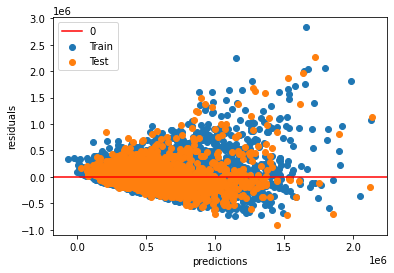

(5153     3.396124e+05
 8989     3.122990e+05
 12131    7.113821e+05
 16542    2.297722e+05
 14826    9.992772e+05
              ...     
 11928    3.945120e+05
 7427     4.227129e+05
 4907     9.043419e+05
 8310     3.864544e+05
 15665    1.013903e+06
 Length: 10757, dtype: float64,
 16166    463705.728678
 6536     534692.521434
 2120     397266.114569
 12182    751698.977049
 12451    924193.272590
              ...      
 7220     397602.433510
 8146     335720.082792
 119      352199.311476
 5454     531301.260928
 6275     587498.285250
 Length: 3586, dtype: float64)

In [277]:
evaluate_model(
X_train,
X_test,
y_train,
y_test)

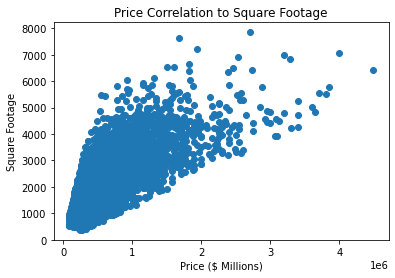

In [278]:
X = df['price']
Y= df['sqft_living']

plt.scatter(X,Y)
plt.title("Price Correlation to Square Footage")
plt.xlabel("Price ($ Millions)")
plt.ylabel("Square Footage")
plt.show()

In [279]:
df['bedrooms'].describe()

count    14343.000000
mean         3.194799
std          0.703683
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: bedrooms, dtype: float64

In [280]:
df['sqft_living'].describe()

count    14343.000000
mean      1983.107927
std        827.470988
min        370.000000
25%       1390.000000
50%       1840.000000
75%       2420.000000
max       7850.000000
Name: sqft_living, dtype: float64

In [281]:
lst_of_rec = df.loc[(df['bedrooms']>1) & (df['bedrooms']<5)]
lst_of_rec

,price,bedrooms,bathrooms,sqft_living,view,grade,Area
1,538000.0,3,2.25,2570,1,7,0
3,604000.0,4,3.00,1960,1,7,0
4,510000.0,3,2.00,1680,1,8,0
5,1230000.0,4,4.50,5420,1,11,0
6,257500.0,3,2.25,1715,1,7,0
...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,1,8,0
21592,360000.0,3,2.50,1530,1,8,0
21593,400000.0,4,2.50,2310,1,8,0
21594,402101.0,2,0.75,1020,1,7,0


In [282]:
len(lst_of_rec)/len(df)

0.9901694206233006

In [283]:
df.loc[(df['sqft_living']>=2420) & (df['price']<=750000)]

,price,bedrooms,bathrooms,sqft_living,view,grade,Area
1,538000.0,3,2.25,2570,1,7,0
15,650000.0,4,3.00,2950,4,9,0
24,329000.0,3,2.25,2450,1,8,0
29,719000.0,4,2.50,2570,1,8,0
39,605000.0,4,2.50,2620,1,8,0
...,...,...,...,...,...,...,...
21547,337000.0,4,2.50,2470,1,8,0
21555,608500.0,4,3.50,2850,1,8,0
21559,399950.0,3,2.50,3087,1,8,0
21564,594866.0,3,3.00,2780,1,9,0


In [284]:
X = df.drop(columns='price')
y = df['price']

In [285]:
df['sqft_living'].apply(lambda x: "Below Average" if x < 1983 else "Above Average")

1        Above Average
3        Below Average
4        Below Average
5        Above Average
6        Below Average
             ...      
21591    Below Average
21592    Below Average
21593    Above Average
21594    Below Average
21596    Below Average
Name: sqft_living, Length: 14343, dtype: object

In [286]:
df['sqft_living'].mean()

1983.1079272118805

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

### First $&(@# Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

## Conclusions


- What would you recommend Mr.Macintosh do as a result of this work?
    - Purchase a home:
        - In the metro
        - With average or below average square footage
        - With 3 bedrooms or 2 bathrooms minimum
- What are some reasons why your analysis might not fully solve Mr.Macintosh's problem?
    - The data that we used does not include the amount of houses that are used for Airbnb. Not knowing this piece of information does not let us know how much competition Mr.Macintosh will have in King County in the Airbnb business. 
    - Additionally our analysis does not provide Mr.Macintosh with any useful data that he can use to determine what the nightly rate of his Airbnb house should be. 
    - Our analysis does not take the attractions that can be seen from certain homes into consideration. If we could have been able to do that, we could have possibly been able to see if the view from a house had any relationship with how popular it might have been as an Airbnb house. 
- What else could you do in the future to improve this project (future work)?
    - Analyze specific AirBnB data to determine the amount of competition Mr.Macintosh should expect at King County, Washington
    - Consider the impact of how popular an Airbnb house can be based on the attractions that eithe inside or outside the city